In [30]:
# Importación de paquetes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import (cross_val_score, train_test_split, RepeatedKFold,
                                     GridSearchCV, ParameterGrid)
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [2]:
# Rutas de los archivos de datos
path_transacciones = "historial_transacciones.csv"
path_clientes = "informacion_clientes.csv"
path_etiquetas = "etiquetas.csv"

# Variables para el modelo
variables = ["RETRASO_PAGO_ESTADO", "DEUDA_MES", "PAGO_MES"]

# Porcentaje de datos para el conjunto de entrenamiento
p_train = 0.70

# Lectura de datos


## Datos de transacciones

In [3]:
import pandas as pd

# Ruta del archivo de transacciones
path_transacciones = "historial_transacciones.csv"


transacciones = pd.read_csv(path_transacciones, sep="|")



# Mostrar las primeras filas del DataFrame para verificar la carga
transacciones.head()


,MONTH,CLIENT_ID,RETRASO_PAGO_ESTADO,DEUDA_MES,PAGO_MES
0,9,29c55f5f-0da7-43ec-ba1b-b60592689825,0,322249,10000
1,9,f818136a-138f-4578-a0bb-41605b67e0e5,0,42635,1623
2,9,bef609a9-f9c5-4870-be7f-cb20e70f7e92,0,143225,6483
3,9,2ba3a218-4792-4672-82c7-4b0953101d41,-1,54798,11632
4,9,723e61b4-d151-4368-b129-468417fd930c,0,129689,5000


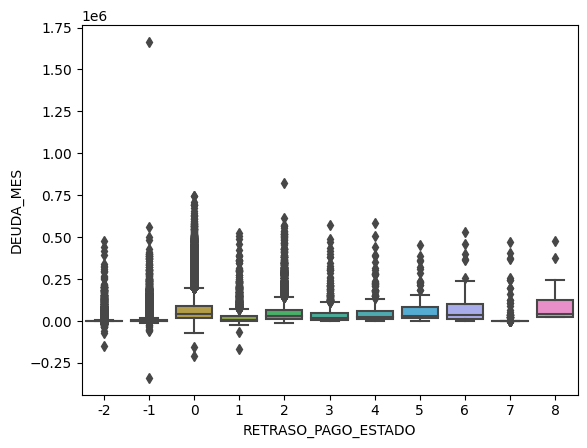

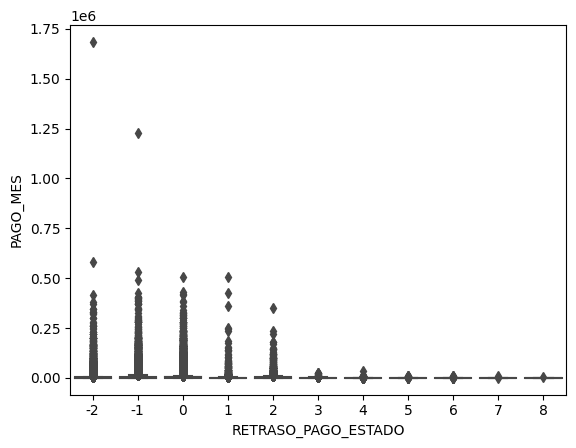

In [4]:
# Iterar a través de las variables "DEUDA_MES" y "PAGO_MES"
for var in ["DEUDA_MES", "PAGO_MES"]:
    # Crear un gráfico de caja (boxplot) utilizando Seaborn
    # con "RETRASO_PAGO_ESTADO" en el eje x y la variable actual (var) en el eje y.
    sns.boxplot(x="RETRASO_PAGO_ESTADO", y=var, data=transacciones)
    
    # Mostrar el gráfico
    plt.show()

In [5]:
# Iterar a través de todas las columnas del DataFrame "transacciones"
for var in transacciones.columns:
    # Calcular y mostrar la cantidad de valores NaN en la columna actual (var)
    # usando el método isna() para identificar los valores NaN y el método sum() para contarlos.
    print("Hay %s NANs en la variable %s" % (transacciones[var].isna().sum(), var))
    
# Fin del bucle


Hay 0 NANs en la variable MONTH
Hay 0 NANs en la variable CLIENT_ID
Hay 0 NANs en la variable RETRASO_PAGO_ESTADO
Hay 0 NANs en la variable DEUDA_MES
Hay 0 NANs en la variable PAGO_MES


In [6]:
# Filtrar el DataFrame "transacciones" para obtener las filas donde el valor de "DEUDA_MES" es menor que cero.
deuda_negativa = transacciones[transacciones.DEUDA_MES < 0]
deuda_negativa.head()

,MONTH,CLIENT_ID,RETRASO_PAGO_ESTADO,DEUDA_MES,PAGO_MES
15,9,5b71a67f-02bf-42e2-831a-1be0e6ab9610,1,-3,4535
33,9,855bb61e-bff9-443d-962d-b670eea5e7fb,-2,-11,0
39,9,3e82f11b-80b0-4009-b330-58ba0d19a893,-2,-5,2153
105,9,51f2c9c0-31df-4a3f-bef0-9887ac87ca22,-2,-330,500
218,9,d2199f96-d5ff-41b0-919d-d210118146e7,-2,-4,0


In [7]:
# Filtrar el DataFrame "transacciones" para obtener las filas donde el valor de "DEUDA_MES" es menor que cero
# y el valor de "PAGO_MES" es mayor que cero, utilizando operadores de comparación y lógicos.
deuda_negativa_pago_positivo = transacciones[(transacciones.DEUDA_MES < 0) & (transacciones.PAGO_MES > 0)]
deuda_negativa_pago_positivo.head()

,MONTH,CLIENT_ID,RETRASO_PAGO_ESTADO,DEUDA_MES,PAGO_MES
15,9,5b71a67f-02bf-42e2-831a-1be0e6ab9610,1,-3,4535
39,9,3e82f11b-80b0-4009-b330-58ba0d19a893,-2,-5,2153
105,9,51f2c9c0-31df-4a3f-bef0-9887ac87ca22,-2,-330,500
244,9,cfb0e460-c840-423f-b0e2-4cf41f4469bc,1,-296,2345
363,9,004e5527-dd4a-48ef-add0-8fc797c4eef6,1,-89,13983


## Datos de clientes

In [8]:
# Importar la biblioteca pandas para trabajar con DataFrames y series de datos.
import pandas as pd

# Leer el archivo CSV y almacenar los datos en un DataFrame llamado "clientes".
# Se utiliza el separador "|" (pipe) para indicar cómo están separados los campos en el archivo.
clientes = pd.read_csv(path_clientes, sep="|")

# Mostrar las primeras filas del DataFrame "clientes" para visualizar la estructura de los datos.
clientes.head()


,CLIENT_ID,Cupo_TC,SEX,EDUCATION,MARRIAGE,AGE
0,29c55f5f-0da7-43ec-ba1b-b60592689825,270000,Femenino,universidad,Casado,28
1,f818136a-138f-4578-a0bb-41605b67e0e5,80000,Femenino,colegio,soltero_a,52
2,bef609a9-f9c5-4870-be7f-cb20e70f7e92,210000,Femenino,universidad,Casado,36
3,2ba3a218-4792-4672-82c7-4b0953101d41,230000,Femenino,colegio,Casado,44
4,723e61b4-d151-4368-b129-468417fd930c,130000,Femenino,Posgrado,Casado,36


In [9]:
clientes.describe()

,Cupo_TC,AGE
count,24000.000000,24000.000000
mean,167828.736667,35.477542
std,129957.242751,9.210014
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


In [10]:
# Importar la biblioteca pandas para trabajar con DataFrames y series de datos.
import pandas as pd

# Contar y mostrar la cantidad de ocurrencias de cada valor en la columna "SEX" del DataFrame "clientes".
# La función pd.value_counts() cuenta las ocurrencias de cada valor único en la serie.
print(pd.value_counts(clientes.SEX))
print()

# Contar y mostrar la cantidad de ocurrencias de cada valor en la columna "EDUCATION" del DataFrame "clientes".
# La función pd.value_counts() cuenta las ocurrencias de cada valor único en la serie.
print(pd.value_counts(clientes.EDUCATION))
print()

# Contar y mostrar la cantidad de ocurrencias de cada valor en la columna "MARRIAGE" del DataFrame "clientes".
# La función pd.value_counts() cuenta las ocurrencias de cada valor único en la serie.
print(pd.value_counts(clientes.MARRIAGE))


Femenino     14507
Masculino     9493
Name: SEX, dtype: int64

universidad    11151
Posgrado        8493
colegio         3967
5                230
otro             107
6                 41
0                 11
Name: EDUCATION, dtype: int64

soltero_a    12752
Casado       10954
otro           245
0               49
Name: MARRIAGE, dtype: int64


In [11]:
# Iterar a través de todas las columnas del DataFrame "clientes".
for var in clientes.columns:
    # Calcular y mostrar la cantidad de valores NaN en la columna actual (var)
    # utilizando el método isna() para identificar los valores NaN y el método sum() para contarlos.
    print("Hay %s NANs en la variable %s" % (clientes[var].isna().sum(), var))

Hay 0 NANs en la variable CLIENT_ID
Hay 0 NANs en la variable Cupo_TC
Hay 0 NANs en la variable SEX
Hay 0 NANs en la variable EDUCATION
Hay 0 NANs en la variable MARRIAGE
Hay 0 NANs en la variable AGE


# Ingenieria de caracteristicas

Se construyen funciones que permiten integrar los datos, además de otras variables que permiten generar nuevas características. Las nuevas variables son:

* **LAST_RETRASO_PAGO_ESTADO:** Cuantas cuotas adelantadas o atrasadas en el último mes.
* **LAST_DEUDA_MES:** Valor de la deuda en el ultimo mes
* **LAST_PAGO_MES:** Valor ultimo pago realizado
* **LAST_PROP_PAGO** Proporción del credito pagado el ultimo mes.
* **LAST_PROP_ENDEU:** Relación deuda/cupo tarjeta de credito ultimo mes.
* **LAST_PROP_PAGO:** Relación pago/cupo tarjeta de credito ultimo mes.

* **MEAN_DEUDA_MES:** Promedio de la deuda en los ultimos 6 meses.
* **MEAN_PAGO_MES:** Promedio ultimo pago realizado en los ultimos 6 meses.
* **MEAN_PROP_PAGO:** Promedio de la proporción del credito pagado los ultimos 6 meses.
* **MEAN_PROP_ENDEU:** Promedio relación deuda/cupo tarjeta de credito ultimos 6 meses.
* **MEAN_PROP_PAGO:** Promedio relación pago/cupo tarjeta de credito ultimos 6 meses.
* **MAX_RETRASO_PAGO_ESTADO:** maximas cuotas adelantadas o atrazadas en los ultimos 6 meses.
* **MAX_PROP_PAGO:** maxima proporción del credito pagado en los ultimos 6 meses.
* **MIN_RETRASO_PAGO_ESTADO:** manimas cuotas adelantadas o atrazadas en los ultimos 6 meses.
* **MIN_PROP_PAGO:** minima proporción del credito pagado en los ultimos 6 meses.
* **MEDIAN_RETRASO_PAGO_ESTADO:** mediana cuotas adelantadas o atrazadas en los ultimos 6 meses.
* **MEDIAN_PROP_PAGO:** mediana proporción del credito pagado en los ultimos 6 meses.

* **TEND_RETRASO:** Pendiente regresión cuotas retrasadas en los ultimos 6 meses.
* **INT_RETRASO:** Intercepto regresión cuotas retrasadas en los ultimos 6 meses.
* **SIG_RETRASO:** Tendencia cuotas retrasadas en los ultimos 6 meses.
* **TEND_DEUDA:** Pendiente regresión valor deuda en los ultimos 6 meses.
* **INT_DEUDA:** Intercepto regresión valor deuda en los ultimos 6 meses.
* **SIG_DEUDA:** Tendencia valor deuda en los ultimos 6 meses.
* **TEND_PAGO:** Pendiente regresión valor pago en los ultimos 6 meses.
* **INT_PAGO:** Intercepto regresión valor pago en los ultimos 6 meses.
* **SIG_PAGO:** Tendencia valor pago en los ultimos 6 meses.





In [12]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np

# Función que calcula la proporción entre dos variables en un DataFrame
def calculate_proportion(df, var1, var2, pago: bool = False):
    n = df[var1]
    d = df[var2]
    # Si pago=True, calcular la proporción incluso si el denominador es cero
    if pago:
        return [n[i] / d[i] if d[i] > 0 else 1 for i in range(d.shape[0])]
    else:
        # Evitar la división por cero, devolviendo 0 si el denominador o el numerador es cero
        return [n[i] / d[i] if d[i] > 0 and n[i] > 0 else 0 for i in range(d.shape[0])]

# Función que encuentra estadísticas para las variables especificadas en un DataFrame
def find_statistics(df, variables):
    # Obtener las últimas filas correspondientes al mes 9 y seleccionar las variables requeridas
    ult = df[df.MONTH == 9][["CLIENT_ID"] + variables]
    ult.set_index("CLIENT_ID", inplace=True)
    ult.columns = ["LAST_" + var for var in variables]

    # Calcular las medias para las variables restantes agrupadas por CLIENT_ID
    prom = df.groupby("CLIENT_ID")[variables[1:]].mean()
    prom.columns = ["MEAN_" + var for var in variables[1:]]

    # Calcular los valores máximos para las primeras y últimas variables agrupadas por CLIENT_ID
    maxim = df.groupby("CLIENT_ID")[[variables[0], variables[3]]].max()
    maxim.columns = ["MAX_" + var for var in [variables[0], variables[3]]]

    # Calcular los valores mínimos para las primeras y últimas variables agrupadas por CLIENT_ID
    minim = df.groupby("CLIENT_ID")[[variables[0], variables[3]]].min()
    minim.columns = ["MIN_" + var for var in [variables[0], variables[3]]]

    # Calcular las medianas para las primeras y últimas variables agrupadas por CLIENT_ID
    median = df.groupby("CLIENT_ID")[[variables[0], variables[3]]].median()
    median.columns = ["MEDIAN_" + var for var in [variables[0], variables[3]]]

    # Combinar los DataFrames con las estadísticas calculadas
    df = pd.merge(ult, prom, left_index=True, right_index=True)
    df = pd.merge(df, maxim, left_index=True, right_index=True)
    df = pd.merge(df, minim, left_index=True, right_index=True)
    df = pd.merge(df, median, left_index=True, right_index=True)

    return df

# Función que realiza el cálculo de la tendencia lineal para una variable
def calcule_tend(y):
    x = []
    x.append(range(len(y)))                 # Variable de tiempo
    x.append([1 for ele in range(len(y))])  # Intercepto, se usa 1 para Python3

    y = np.matrix(y).T
    x = np.matrix(x).T

    # Cálculo de los coeficientes (betas) de la recta de regresión
    betas = ((x.T * x).I * x.T * y)

    return betas

# Función que calcula la tendencia, el intercepto y el signo de una variable y la agrega al DataFrame
def tendencia(df, valname, name):
    d = df.pivot(index="CLIENT_ID", columns="MONTH", values=valname)
    d["TEND_" + name] = [float(calcule_tend(d.loc[x, :])[0]) for x in d.index]
    d["INT_" + name] = [float(calcule_tend(d.loc[x, :])[1]) for x in d.index]
    d["SIG_" + name] = d["TEND_" + name].apply(lambda x: -1 if x < 0 else 1)

    return d[["TEND_" + name, "INT_" + name, "SIG_" + name]]

# Función que realiza un análisis de información sobre transacciones y calcula proporciones
def transaction_info(df):
    variables = ["RETRASO_PAGO_ESTADO", "DEUDA_MES", "PAGO_MES", "PROP_PAGO"]
    
    # Calcular la proporción de PAGO_MES sobre DEUDA_MES y agregarla al DataFrame
    df["PROP_PAGO"] = calculate_proportion(df, "PAGO_MES", "DEUDA_MES", True)
    
    # Encontrar estadísticas para las variables especificadas en el DataFrame
    tr = find_statistics(df, variables)
    
    # Calcular la tendencia para diferentes variables y agregarla al DataFrame
    t_pago = tendencia(df, "PAGO_MES", "PAGO")
    t_retraso = tendencia(df, "RETRASO_PAGO_ESTADO", "RETRASO")
    t_deuda = tendencia(df, "DEUDA_MES", "DEUDA")

    tr = pd.merge(tr, t_retraso, left_index=True, right_index=True)
    tr = pd.merge(tr, t_deuda, left_index=True, right_index=True)
    tr = pd.merge(tr, t_pago, left_index=True, right_index=True)
    
    return tr

# Función que lee un archivo CSV y ajusta el índice del DataFrame resultante
def read_file(path, var):  
    df = pd.read_csv(path, sep="|")
    df.set_index(var, inplace=True)
    return df

# Función que realiza transformaciones en el DataFrame de clientes
def clientes_info(df):
    # Convertir valores de la columna "SEX" en valores numéricos (1: Femenino, 0: Masculino)
    df.SEX = df.SEX.apply(lambda x: 1 if x == "Femenino" else 0)
    # Posible codificación categórica de las columnas "EDUCATION" y "MARRIAGE"
    #df = pd.get_dummies(df, columns=["EDUCATION","MARRIAGE"])
    return df

# Función que concatena la información de transacciones y clientes
def concat_data(path_transacciones, path_clientes, path_etiquetas):
    # Obtener información de transacciones procesada
    transacciones = transaction_info(pd.read_csv(path_transacciones, sep="|"))
    # Obtener información de clientes procesada
    clientes = clientes_info(read_file(path_clientes, "CLIENT_ID"))

    # Combinar DataFrames para obtener la información final
    df = pd.merge(clientes, transacciones, left_index=True, right_index=True)
    
    # Calcular proporciones adicionales y agregar etiquetas de clientes desde otro archivo
    df["LAST_PROP_ENDEU"] = calculate_proportion(df, "LAST_DEUDA_MES", "Cupo_TC")
    df["LAST_PROP_PAGO"] = calculate_proportion(df, "LAST_PAGO_MES", "Cupo_TC")
    df["MEAN_PROP_ENDEU"] = calculate_proportion(df, "MEAN_DEUDA_MES", "Cupo_TC")
    df["MEAN_PROP_PAGO"] = calculate_proportion(df, "MEAN_PAGO_MES", "Cupo_TC")

    # Agregar etiquetas de clientes desde otro archivo CSV
    df = pd.merge(df, read_file(path_etiquetas, "CLIENT_ID"), left_index=True, right_index=True)
    
    return df


In [13]:


# Llama a la función concat_data con las rutas de los archivos como argumentos
df = concat_data(path_transacciones, path_clientes, path_etiquetas)

# Extrae los valores de la última columna del DataFrame 'df' y guárdalos en la variable 'y'
y = df.iloc[:, -1].values

# Ahora 'y' contiene los valores de la última columna de 'df', que podrían ser las etiquetas del conjunto de datos


# Selección de variables


<AxesSubplot: xlabel='default payment next month', ylabel='Cupo_TC'>

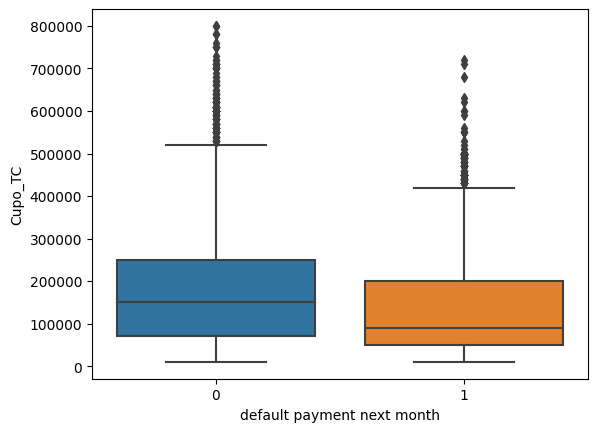

In [14]:
import seaborn as sns  # Importa la librería Seaborn para visualización de datos

# Crea un diagrama de caja (boxplot) utilizando la función boxplot de Seaborn
# 'x' representa las categorías en el eje x (por ejemplo, "default payment next month" en este caso)
# 'y' representa los valores numéricos de la columna "Cupo_TC" en el DataFrame 'df'
# 'data' especifica el DataFrame que contiene los datos a visualizar
sns.boxplot(x="default payment next month", y="Cupo_TC", data=df)

# El diagrama de caja mostrará la distribución y la variabilidad de los valores en la columna "Cupo_TC"
# separados por las categorías en la columna "default payment next month"
# Los diagramas de caja son útiles para identificar tendencias y posibles valores atípicos en los datos


In [15]:
# Crea una tabla de contingencia cruzada utilizando la función crosstab de Pandas
# 'df["default payment next month"]' representa una de las variables a cruzar en el eje x
# 'df["EDUCATION"]' representa la otra variable a cruzar en el eje y
# 'normalize=0' normaliza los valores en función de las filas para mostrar proporciones en lugar de recuentos
crosstab_result = pd.crosstab(df["default payment next month"], df["EDUCATION"], normalize=0)

# 'crosstab_result' contendrá la tabla de contingencia cruzada con las proporciones normalizadas

# Puedes imprimir 'crosstab_result' o realizar otras operaciones con ella según tus necesidades
crosstab_result



EDUCATION,0,5,6,Posgrado,colegio,otro,universidad
default payment next month,,,,,,,
0,0.000588,0.011488,0.001870,0.366497,0.159231,0.005450,0.454876
1,0.000000,0.002838,0.001135,0.309177,0.186755,0.000946,0.499149


In [16]:

# Crea una tabla de contingencia cruzada utilizando la función crosstab de Pandas
# 'df["default payment next month"]' representa una de las variables a cruzar en el eje x
# 'df["MARRIAGE"]' representa la otra variable a cruzar en el eje y
# 'normalize=0' normaliza los valores en función de las filas para mostrar proporciones en lugar de recuentos
crosstab_result = pd.crosstab(df["default payment next month"], df["MARRIAGE"], normalize=0)

# 'crosstab_result' contendrá la tabla de contingencia cruzada con las proporciones normalizadas

# Puedes imprimir 'crosstab_result' o realizar otras operaciones con ella según tus necesidades
crosstab_result



MARRIAGE,0,Casado,otro,soltero_a
default payment next month,,,,
0,0.002351,0.449532,0.009671,0.538445
1,0.000946,0.480795,0.012110,0.506149


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Función para calcular la importancia de las características usando MDI (Mean Decrease in Impurities)
def importance_MDI(X, y, feature_names):
    # Crea un clasificador de Random Forest
    forest = RandomForestClassifier(random_state=0)
    forest.fit(X, y)

    # Calcula las importancias de las características y la desviación estándar
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
    
    # Crea y retorna un DataFrame con las importancias y la desviación estándar
    return pd.DataFrame({"importancia": importances, "std": std}, index=feature_names)

# Función para calcular la importancia de las características usando permutación
def importance_permutation(X, y, feature_names):
    # Crea un clasificador de Random Forest
    forest = RandomForestClassifier(random_state=0)
    forest.fit(X, y)
    
    # Divide los datos en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
    
    # Calcula las importancias de las características usando permutación
    importances = forest.feature_importances_
    result = permutation_importance(forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
    importances = result.importances_mean
    std = result.importances_std
    
    # Crea y retorna un DataFrame con las importancias y la desviación estándar
    return pd.DataFrame({"importancia": importances, "std": std}, index=feature_names)

# Función para graficar las importancias de características
def plot_importances(forest_importances, method):
    std = forest_importances["std"]
    forest_importances = forest_importances.importancia
    
    # Crea una figura y ejes para la gráfica
    fig, ax = plt.subplots()
    
    # Grafica las importancias de características con barras y muestra la desviación estándar
    forest_importances.plot.bar(yerr=std, ax=ax)
    
    # Configura el título y etiquetas de los ejes
    ax.set_title("Feature importances using " + method)
    ax.set_ylabel("Mean decrease in impurity")
    
    # Ajusta el diseño de la figura y muestra la gráfica
    fig.tight_layout()
    plt.show()


In [18]:
# Selecciona todas las columnas excepto la última utilizando iloc
X_temp = df.iloc[:, :-1]

# Elimina las columnas 'LAST_PROP_ENDEU' y 'INT_DEUDA' del DataFrame
X_temp.drop(columns=['LAST_PROP_ENDEU', 'INT_DEUDA'], inplace=True)

# Realiza codificación one-hot para las variables categóricas en X_temp
X_temp = pd.get_dummies(X_temp)

# Obtiene la lista de nombres de características después de la codificación
feature_names1 = list(X_temp.columns.tolist())


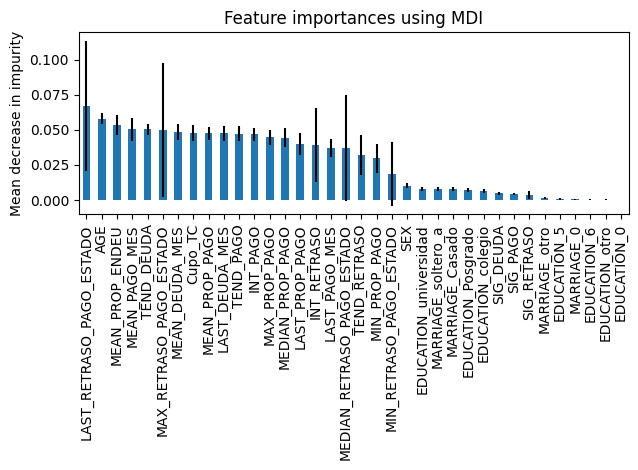

In [19]:
# Calcula la importancia de características utilizando MDI
mdi = importance_MDI(X_temp, y, feature_names1)

# Grafica las importancias de características utilizando la función plot_importances
# Ordena las características de mayor a menor importancia
plot_importances(mdi.sort_values(by="importancia", ascending=False), "MDI")


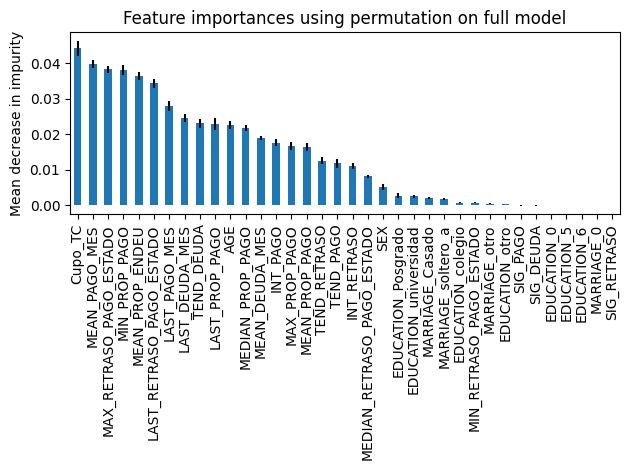

In [20]:
# Calcula la importancia de características utilizando el método de permutación
per = importance_permutation(X_temp, y, feature_names1)

# Grafica las importancias de características utilizando la función plot_importances
# Ordena las características de mayor a menor importancia
plot_importances(per.sort_values(by="importancia", ascending=False), "permutation on full model")


In [21]:
# Obtiene los índices de las 10 características más importantes según el método de permutación
per_top_features = per.sort_values(by="importancia", ascending=False).index[:10]

# Obtiene los índices de las 10 características más importantes según el método MDI
mdi_top_features = mdi.sort_values(by="importancia", ascending=False).index[:10]

# Encuentra la intersección de las dos listas de índices
common_top_features = set(per_top_features).intersection(mdi_top_features)

# La variable 'common_top_features' contendrá las características que son comunes entre
# las 10 características más importantes según los métodos de permutación y MDI
common_top_features

{'Cupo_TC',
 'LAST_DEUDA_MES',
 'LAST_RETRASO_PAGO_ESTADO',
 'MAX_RETRASO_PAGO_ESTADO',
 'MEAN_PAGO_MES',
 'MEAN_PROP_ENDEU',
 'TEND_DEUDA'}

# Comprobar desbalanceo

In [22]:
# Calcular la proporción de cada valor único en la columna "default payment next month" del DataFrame "df"
proportion_default = np.array(df["default payment next month"].value_counts().tolist()) / sum(df["default payment next month"].value_counts().tolist())

proportion_default

array([0.77979167, 0.22020833])

<AxesSubplot: >

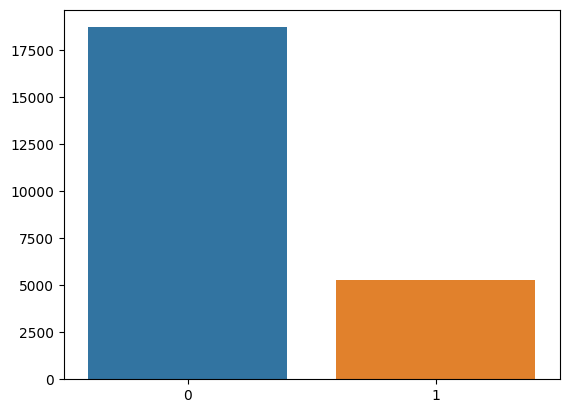

In [23]:
import seaborn as sns  # Importa la librería Seaborn para visualización de datos

# Crea un gráfico de barras usando la función barplot de Seaborn
# La variable 'x' representa las posiciones en el eje x (0 y 1) y 'y' representa los valores de conteo
# de la columna "default payment next month" en el DataFrame 'df'
sns.barplot(x=[0, 1], y=df["default payment next month"].value_counts().tolist())

# El gráfico de barras mostrará la distribución de los valores en la columna "default payment next month"
# donde 0 y 1 podrían representar diferentes categorías, por ejemplo, "no default" y "default"
# La función value_counts() cuenta los valores únicos en la columna
# y tolist() convierte los conteos en una lista de valores que se utilizarán en el eje y del gráfico

# Ajuste de modelos

In [24]:
# Realiza codificación one-hot para todas las variables categóricas en el DataFrame 'df'
df = pd.get_dummies(df)

# En este punto, el DataFrame 'df' ha sido transformado con codificación one-hot,
# donde las variables categóricas se han convertido en columnas binarias

In [25]:
from sklearn.model_selection import train_test_split

# Divide el DataFrame 'df' en conjuntos de entrenamiento y prueba
# X_train contendrá todas las columnas excepto "default payment next month"
# y_train contendrá la columna "default payment next month"
# random_state se establece para reproducibilidad
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns="default payment next month"),  # Variables predictoras (X)
    df["default payment next month"],  # Variable objetivo (y)
    random_state=123
)

# En este punto, los conjuntos de entrenamiento y prueba han sido creados
# X_train contiene las características para el entrenamiento
# y_train contiene las etiquetas correspondientes al entrenamiento
# X_test contiene las características para la evaluación
# y_test contiene las etiquetas correspondientes a la evaluación



## Ramdomt forest

In [26]:
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.ensemble import RandomForestClassifier
import multiprocessing
import pandas as pd

# Define el diccionario de parámetros para la búsqueda en la cuadrícula
param_grid1 = {
    'n_estimators': [100, 150],
    'max_depth': [3, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Crea un objeto GridSearchCV para buscar los mejores hiperparámetros
grid1 = GridSearchCV(
    estimator=RandomForestClassifier(random_state=123),  # Estimador a ajustar
    param_grid=param_grid1,  # Diccionario de parámetros
    scoring='f1',  # Métrica de evaluación
    n_jobs=multiprocessing.cpu_count() - 1,  # Número de núcleos a usar en paralelo
    cv=RepeatedKFold(n_splits=3, n_repeats=1, random_state=123),  # Estrategia de validación cruzada
    refit=True,  # Ajustar el modelo con los mejores parámetros al final
    verbose=True,  # Mostrar información detallada
    return_train_score=True  # Incluir resultados de entrenamiento en el DataFrame de resultados
)

# Ajusta el objeto GridSearchCV al conjunto de entrenamiento
grid1.fit(X=X_train, y=y_train)

# Crea un DataFrame con los resultados de la búsqueda en la cuadrícula
resultados1 = pd.DataFrame(grid1.cv_results_)

# Filtra y muestra los resultados relevantes, ordenando por la puntuación media de prueba
top_results1 = resultados1.filter(regex='(param.*|mean_t|std_t)') \
    .drop(columns='params') \
    .sort_values('mean_test_score', ascending=False) \
    .head(4)

# 'top_results1' contendrá los mejores resultados de la búsqueda en la cuadrícula


Fitting 3 folds for each of 12 candidates, totalling 36 fits


c:\Users\ydmarinb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [27]:
# Imprime una línea separadora
print("----------------------------------------")

# Imprime los mejores hiperparámetros encontrados y la mejor puntuación
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid1.best_params_, ":", grid1.best_score_, grid1.scoring)


----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 100} : 0.4690196587479138 f1


In [28]:
# Obtiene el mejor modelo encontrado durante la búsqueda en la cuadrícula
modelo_final1 = grid1.best_estimator_

# Realiza predicciones en el conjunto de prueba utilizando el mejor modelo
predicciones1 = modelo_final1.predict(X=X_test)

# En este punto, 'modelo_final1' es el mejor modelo encontrado con los mejores hiperparámetros,
# y 'predicciones1' contiene las predicciones realizadas por el modelo en el conjunto de prueba.


In [43]:
mat_confusion1 = confusion_matrix(
                    y_true    = y_test,
                    y_pred    = predicciones1,
                    labels=[1, 0]
                )

precision1 = precision_score(
            y_true    = y_test,
            y_pred    = predicciones1,
            pos_label=1
           )

print("Matriz de confusión")
print("-------------------")
print(mat_confusion1)
print("")
print(f"La precision del test es: {100 * precision1} %")

Matriz de confusión
-------------------
[[ 472  898]
 [ 179 4451]]

La precision del test es: 72.50384024577573 %


## Gradient boosting

In [44]:
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.linear_model import LogisticRegression
import multiprocessing
import pandas as pd

# Define el diccionario de parámetros para la búsqueda en la cuadrícula
param_grid2 = {
    'penalty': ['l1', 'l2'],
    'solver': ['newton-cg', 'lbfgs']
}

# Crea un objeto GridSearchCV para buscar los mejores hiperparámetros
grid2 = GridSearchCV(
    estimator=LogisticRegression(random_state=123),  # Estimador a ajustar
    param_grid=param_grid2,  # Diccionario de parámetros
    scoring='f1',  # Métrica de evaluación
    n_jobs=multiprocessing.cpu_count() - 1,  # Número de núcleos a usar en paralelo
    cv=RepeatedKFold(n_splits=3, n_repeats=1, random_state=123),  # Estrategia de validación cruzada
    refit=True,  # Ajustar el modelo con los mejores parámetros al final
    verbose=True,  # Mostrar información detallada
    return_train_score=True  # Incluir resultados de entrenamiento en el DataFrame de resultados
)

# Ajusta el objeto GridSearchCV al conjunto de entrenamiento
grid2.fit(X=X_train, y=y_train)

# Crea un DataFrame con los resultados de la búsqueda en la cuadrícula
resultados2 = pd.DataFrame(grid2.cv_results_)

# Filtra y muestra los resultados relevantes, ordenando por la puntuación media de prueba
top_results2 = resultados2.filter(regex='(param.*|mean_t|std_t)') \
    .drop(columns='params') \
    .sort_values('mean_test_score', ascending=False) \
    .head(4)

# 'top_results2' contendrá los mejores resultados de la búsqueda en la cuadrícula


Fitting 3 folds for each of 4 candidates, totalling 12 fits


c:\Users\ydmarinb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
6 fits failed out of a total of 12.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ydmarinb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ydmarinb\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

In [42]:
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid2.best_params_, ":", grid2.best_score_, grid2.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'penalty': 'l2', 'solver': 'newton-cg'} : 0.35187789992618734 f1


In [45]:
# Obtiene el mejor modelo encontrado durante la búsqueda en la cuadrícula
modelo_final2 = grid2.best_estimator_

# Realiza predicciones en el conjunto de prueba utilizando el mejor modelo
predicciones2 = modelo_final2.predict(X=X_test)

# En este punto, 'modelo_final2' es el mejor modelo encontrado con los mejores hiperparámetros,
# y 'predicciones2' contiene las predicciones realizadas por el modelo en el conjunto de prueba.


In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Calcula la matriz de confusión utilizando las predicciones del modelo 2
mat_confusion2 = confusion_matrix(
    y_true=y_test,
    y_pred=predicciones2,
    labels=[1, 0]
)

precision2 = precision_score(
            y_true    = y_test,
            y_pred    = predicciones2,
            pos_label=1
           )

print("Matriz de confusión")
print("-------------------")
print(mat_confusion1)
print("")
print(f"La precision del test es: {100 * precision2} %")


Matriz de confusión
-------------------
[[ 472  898]
 [ 179 4451]]

La precision del test es: 72.79411764705883 %
